# Stock Evaluation


### Overall process
- Data collection and preprocess
- Analysis
- Summary

In [1]:
#import libraries

import pandas as pd
import json
import datetime
import matplotlib.pyplot as plt

In [2]:
# initial code
code_init_1 = "none"

### 1. Data collection
#### 1.1 fetch data from official web

- Data set of stock list in SET-100

In [3]:
l_stock = ['AAV', 'ADVANC', 'AEONTS', 'AMATA', 'ANAN',
           'AOT', 'AP', 'BANPU', 'BBL', 'BCH', 'BCP',
           'BCPG', 'BDMS', 'BEAUTY', 'BEC', 'BEM',
           'BGRIM', 'BH', 'BJC', 'BLAND', 'BPP',
           'BTS', 'CBG', 'CENTEL', 'CHG', 'CK',
           'CKP', 'COM7', 'CPALL', 'CPF', 'CPN',
           'DELTA', 'DTAC', 'EA', 'EGCO', 'EPG',
           'ERW', 'ESSO', 'GFPT', 'GLOBAL', 'GOLD',
           'GPSC', 'GULF', 'GUNKUL', 'HANA', 'HMPRO',
           'INTUCH', 'IRPC', 'IVL', 'KBANK', 'KCE',
           'KKP', 'KTB', 'KTC', 'LH', 'MAJOR', 'MBK',
           'MEGA', 'MINT', 'MTC', 'ORI', 'PLANB', 'PRM',
           'PSH', 'PSL', 'PTG', 'PTT', 'PTTEP', 'PTTGC',
           'QH', 'RATCH', 'ROBINS', 'RS', 'SAWAD', 'SCB',
           'SCC', 'SGP', 'SIRI', 'SPALI', 'SPRC', 'STA',
           'STEC', 'SUPER', 'TASCO', 'TCAP', 'THAI', 
           'THANI', 'TISCO', 'TKN', 'TMB', 'TOA', 'TOP',
           'TPIPP', 'TRUE', 'TTW', 'TU', 'TVO', 'WHA',
           'WHAUP', 'WORK']

- Fetch price data from web

In [4]:
if code_init_1 == "yes":
    sum_data=[]
    currentDT = datetime.datetime.now()
    for k in range(len(l_stock)):
        l_data = []
        #print(str(k+1)+"/"+str(len(l_stock))+" processing")
        for i in range(9):
            url = "https://www.settrade.com/C04_02_stock_historical_p1.jsp?txtSymbol="+l_stock[k]+"&selectPage=2&max=15&offset="+str(i*15)
            data = pd.read_html(url)
            for j in range(len(data[0].values.tolist())):
                l_data.append(data[0].values.tolist()[j])
        sum_data.append([l_stock[k],l_data])
        #print('done')
    currentDT1 = datetime.datetime.now()
    print (str(currentDT1-currentDT))

- Fetch financial data from website

In [5]:
if code_init_1 == "yes":
    index_a = [18,19,23,24,25,26,28,29]
    fin_data = []
    for i in range(len(l_stock)):
        url_01 = "https://www.set.or.th/set/factsheet.do?symbol="+l_stock[0]+"&ssoPageId=3&language=th&country=TH"
        #print(str(i+1)+"/"+str(len(l_stock))+" processing")
        data_01 = pd.read_html(url_01)
        state_data = []
        for j in index_a:
            state_data.append(data_01[j].values.tolist())
        fin_data.append([l_stock[i],state_data])
        #print('done')


- Fetch current financial data

In [6]:
if code_init_1 == "yes":
    cur_fin_data = []
    for i in range(len(l_stock)):
        url_01 = "https://www.set.or.th/set/companyfinance.do?type=balance&symbol="+l_stock[i]+"&language=th&country=TH"
        #print(str(i+1)+"/"+str(len(l_stock))+" processing")
        data_01 = pd.read_html(url_01)
        #print('done')
        url_02 = "https://www.set.or.th/set/companyfinance.do?type=income&symbol="+l_stock[i]+"&language=th&country=TH"
        data_02 = pd.read_html(url_02)
        url_03 = "https://www.set.or.th/set/companyfinance.do?type=cashflow&symbol="+l_stock[i]+"&language=th&country=TH"
        data_03 = pd.read_html(url_03)
        cur_fin_data.append([l_stock[i],data_01[1][1][0],data_01[2].values.tolist(),data_02[2].values.tolist(),data_03[2].values.tolist()])


- Fetch overview financial data

In [7]:
if code_init_1 == "yes":
    over_fin_data = []
    for i in range(len(l_stock)):
        print(str(i+1)+"/"+str(len(l_stock))+" processing")
        url_1 = "https://www.set.or.th/set/companyhighlight.do?symbol="+l_stock[i]+"&ssoPageId=5&language=th&country=TH"
        data_1 = pd.read_html(url_1)
        over_fin_data.append([l_stock[i],data_1[0].values.tolist()])

#### 1.2 Record data to local folder

In [8]:
# Save fetched data to json file

if code_init_1 == "yes":
    file_data = {'batch1':sum_data}
    with open('data_1_ex.json', 'w') as fp:
        json.dump(file_data, fp)

In [9]:
# Get column name and save them to json file

if code_init_1 == "yes":
    l_col=[]
    for col in data[0].columns: 
        #print(col)
        l_col.append(col)

    file_col = {'batch1':l_col}
    with open('data_col_1_ex.json', 'w') as fp:
        json.dump(file_col, fp)

In [10]:
# Save financial data

if code_init_1 == "yes":
    file_fin = {'batch1':fin_data}
    with open('data_fin_1_ex.json', 'w') as fp2:
        json.dump(file_fin, fp2)

In [11]:
# Save current financial data

if code_init_1 == "yes":
    file_cur_fin = {'batch1':cur_fin_data}
    with open('data_cur_fin_1_ex.json', 'w') as fp2:
        json.dump(file_cur_fin, fp2)

In [12]:
# Save overview financial data

if code_init_1 == "yes":
    file_over_fin = {'batch1':over_fin_data}
    with open('data_over_fin_1_ex.json', 'w') as fp2:
        json.dump(file_over_fin, fp2)

#### 1.3 Check data

- Check column data

In [13]:
with open('data_col_1.json','r') as json_file:
    data_col = json.load(json_file)
data_col

{'batch1': ['วันที่',
  'ราคาเปิด',
  'ราคาสูงสุด',
  'ราคาต่ำสุด',
  'ราคาเฉลี่ย',
  'ราคาปิด',
  'เปลี่ยนแปลง',
  '%เปลี่ยนแปลง',
  'ปริมาณ(พันหุ้น)',
  'มูลค่า(ล้านบาท)',
  'SETIndex',
  '%เปลี่ยนแปลง.1']}

- Check price stock data

In [14]:
with open('data_1.json','r') as json_file:
    data_s = json.load(json_file)
print(data_s['batch1'][0][0])
print(data_s['batch1'][0][1][0])

AAV
['29/10/19', 2.52, 2.6, 2.5, 2.53, 2.5, -0.02, -0.79, 11655.4, 29.53, 1591.21, -0.33]


- Check financial data

In [15]:
with open('data_fin_1.json','r') as json_file:
    data_f = json.load(json_file)
print(data_f["batch1"][10][1][0])

[['สะสม: อัตราหมุนเวียนปริมาณการซื้อขาย, มูลค่าซื้อขาย/วัน', 'สะสม: อัตราหมุนเวียนปริมาณการซื้อขาย, มูลค่าซื้อขาย/วัน', 'สะสม: อัตราหมุนเวียนปริมาณการซื้อขาย, มูลค่าซื้อขาย/วัน', 'สะสม: อัตราหมุนเวียนปริมาณการซื้อขาย, มูลค่าซื้อขาย/วัน'], ['ข้อมูลสถิติ', 'YTD30 ต.ค. 2562', '256128 ธ.ค. 2561', '256029 ธ.ค. 2560'], ['จำนวนหุ้นจดทะเบียน (ล้านหุ้น)', '4850.00', '4850.00', '4850.00'], ['มูลค่าหลักทรัพย์ตามราคาตลาด (ลบ.)', '12222.00', '20370.00', '29827.50'], ['ราคา (บาท/หุ้น)', '2.52', '4.20', '6.15'], ['มูลค่าหุ้นทางบัญชีต่อหุ้น (บาท/หุ้น)', '4.21', '4.27', '4.59'], ['P/BV (X)', '0.60', '0.98', '1.34'], ['P/E (X)', nan, '24.98', '28.59'], ['อัตราหมุนเวียนปริมาณการซื้อขาย (%)', '56.74', '65.74', '130.69'], ['มูลค่าซื้อขาย/วัน (ลบ.)', '53.68', '63.26', '152.93'], ['Beta', '1.06', '0.63', '0.64'], [nan, nan, nan, nan], ['อัตราผลตอบแทน', 'YTD', '2561', '2560'], ['การเปลี่ยนแปลงของราคา (%)', '-40.00', '-31.71', '1.65'], ['อัตราเงินปันผลตอบแทน (%)', '13.29', '3.57', '2.44'], ['อัตราส่วนเงินปันผล

- Check current financial data

In [16]:
with open('data_cur_fin_1.json','r') as json_file:
    data_c_f = json.load(json_file)
print(data_c_f["batch1"][3][2][2])

[nan, 'เงินลงทุนระยะสั้น', '948.79']


- Check overview financial data

In [17]:
with open('data_over_fin_1.json','r') as json_file:
    data_o_f = json.load(json_file)
print(data_o_f["batch1"][3][1][1])

['สินทรัพย์รวม', '25451.40', '26595.70', '29279.67', '33021.43', '33290.32']


### 2. Analysis

#### Target of analysis

- Select stocks which have good financial management from SET market
- Stock evaluation in price and value of company

#### 2.1 Debt analysis

In [18]:
# get debt
print(data_f["batch1"][10][1][2][10])
print(data_f["batch1"][10][1][2][6])
print(data_f["batch1"][10][1][2][0])


['รวมหนี้สินหมุนเวียน', '11714.66', '9200.66', '11022.16', '10910.14', '9270.10']
['รวมสินทรัพย์', '60996.47', '62374.73', '61746.72', '62773.56', '56599.43']
['งบแสดงฐานะการเงิน (ลบ.)', '6M/2562\xa0(01/01/62 -30/06/62)', '6M/2561\xa0(01/01/61 -30/06/61)', '2561\xa0(01/01/61 -31/12/61)', '2560\xa0(01/01/60 -31/12/60)', '2559\xa0(01/01/59 -31/12/59)']


In [19]:
asset = data_f["batch1"][10][1][2][6]
debt = data_f["batch1"][10][1][2][10]

In [20]:
exp_label = ["Debt","Equity"]
exp_value = [debt[1],float(asset[1])-float(debt[1])]
exp_value

['11714.66', 49281.81]

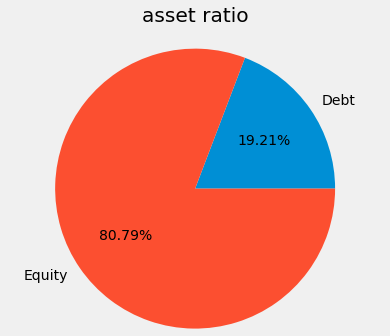

D/E ratio = 0.24


In [21]:
plt.style.use("fivethirtyeight")
plt.axis("equal")
plt.title("asset ratio\n\n")
plt.pie(exp_value,labels=exp_label,radius=1.5,autopct='%0.2f%%')
plt.show()
print("D/E ratio = "+str(round(float(debt[1])/(float(asset[1])-float(debt[1])),2)))

#### 2.2 liquidity analysis

- Current ratio

$$Current\;ratio =\;รวมสินทรัพย์หมุนเวียน\;/ \;รวมหนี้สินหมุนเวียน$$

In [22]:
# total total current asset / current liabilities
k=3
for i in range(len(data_c_f["batch1"][3][2])):
    #print(data_c_f["batch1"][k][2][i][1])
    if data_c_f["batch1"][k][2][i][1]=="รวมสินทรัพย์หมุนเวียน":
        print(data_c_f["batch1"][k][2][i][1]+" : "+data_c_f["batch1"][k][2][i][2])
        t_c_asset = data_c_f["batch1"][k][2][i][2]
    elif data_c_f["batch1"][k][2][i][1]=="รวมหนี้สินหมุนเวียน":
        print(data_c_f["batch1"][k][2][i][1]+" : "+data_c_f["batch1"][k][2][i][2])
        t_c_debt = data_c_f["batch1"][k][2][i][2]
        
print("\n"+data_c_f["batch1"][k][0])
print("Current ratio "+str(round(float(t_c_asset)/float(t_c_debt),2)))

รวมสินทรัพย์หมุนเวียน : 10062.89
รวมหนี้สินหมุนเวียน : 4411.82

AMATA
Current ratio 2.28


- Quick ratio

$$Quick\;ratio = (รวมสินทรัพย์หมุนเวียน\;-\;สินค้าคงเหลือ)\;/\;รวมหนี้สินหมุนเวียน$$

In [23]:
k=3
for i in range(len(data_c_f["batch1"][3][2])):
    #print(data_c_f["batch1"][k][2][i][1])
    print
    if data_c_f["batch1"][k][2][i][1]=="สินค้าคงเหลือ":
        print(data_c_f["batch1"][k][2][i][1]+" : "+data_c_f["batch1"][k][2][i][2])
        t_c_inventory = data_c_f["batch1"][k][2][i][2]
print("\n"+data_c_f["batch1"][k][0])
print("Current ratio "+str(round((float(t_c_asset)-float(t_c_inventory))/float(t_c_debt),2)))

สินค้าคงเหลือ : 7940.18

AMATA
Current ratio 0.48


#### 2.3 Corporate income analysis